In [13]:
from numpy import array, arange, sin, pi, cos, sqrt
from pylab import plot, show, legend, xlabel, ylabel, title
import vpython as vp

# Set up scene
scene = vp.canvas(background = vp.color.white, width=600, height=600)

c = 0.0
A = 0.1
freq = 1.0                          #frequency of external force

def f(r,t):
    theta = r[0]
    omega = r[1]
    F = A*sin(freq*t)
    ftheta = omega
    fomega = -g/l*sin(theta) - c*omega + F
    return array([ftheta, fomega], float)

#parameters
m = 1.0                          # mass of pendulum bob
g = 1.0                          # gravitational acceleration
l = 1.0                          # length of pendulum
theta0 = 0.25*pi                 # initial angle
omega0 = 0                       # initial angular velocity
r = array([theta0, omega0])      # initial conditions
t0 = 0                           # initial time
tf = 100                          # final time
N = 1000                         # number of points
h = (tf - t0)/N                  # step size
tpoints = arange(t0, tf, h)      # time values
thetalist = []                   # empty list for theta
omegalist = []                   # empty list for omega

# set up graphs
vp.graph(width=400, height=250, xtitle="Time", ytitle="Theta (radians)")
thetaDots = vp.gdots(color=vp.color.green, label="theta")
thetaDots.plot(t0,theta0)

# Coordinate axes
axisRadius = 0.01
axisColor = vp.vector(0.5, 0.5, 0.5)

xaxis = vp.cylinder(pos=vp.vector(-5,0,0), axis=vp.vector(10,0,0), radius = axisRadius, color=axisColor)
yaxis = vp.cylinder(pos=vp.vector(0,-5,0), axis=vp.vector(0,10,0), radius = axisRadius, color=axisColor)
zaxis = vp.cylinder(pos=vp.vector(0,0,-5), axis=vp.vector(0,0,10), radius = axisRadius, color=axisColor)
vp.label(pos=xaxis.pos + xaxis.axis, text='x', height=10, box=False)
vp.label(pos=yaxis.pos + yaxis.axis, text='y', height=10, box=False)
vp.label(pos=zaxis.pos + zaxis.axis, text='z', height=10, box=False)

# Box
pivot = vp.vector(0,0,0)
bob = vp.sphere(pos=vp.vector(l * cos(theta0 - pi/2),l * sin(theta0 - pi/2),0), size=vp.vector(.5,.5,.5), color=vp.color.red, make_trail=False)
rod = vp.cylinder(pos=pivot, axis=bob.pos-pivot, radius=0.05, color=vp.color.blue)

for t in tpoints:
    vp.rate(20)
    thetalist.append(r[0])       # append theta
    omegalist.append(r[1])       # append omega

    #4th order Runge Kutta
    k1 = h*f(r, t)
    k2 = h*f(r + 0.5*k1, t + 0.5*h)
    k3 = h*f(r + 0.5*k2, t + 0.5*h)
    k4 = h*f(r + k3, t + h)
    r += 1/6*(k1 + 2*k2 + 2*k3 + k4)
    
    bob.pos = vp.vector(l * cos(r[0] - pi/2),l * sin(r[0] - pi/2),0)
    rod.axis = bob.pos-pivot
    thetaDots.plot(t,r[0])

<IPython.core.display.Javascript object>

1) With c = 0.5, A = 0.0, we just get a dampening so the bob eventually comes to rest at the bottom. The external force is 0. 

2) With c = 0.5, A = 0.5, f = 1.0, the external force dominates and so forces the bob to occilate close to the value of the external force

3) With c = 0.0, A = 0.1, f = 1.0, the external force lines up pretty well with the force of gravity, but it actually is slightly stronger
so eventually it puts enough energy into the system to flip the bob over the top.

3) With c = 0.5, A = 1.2, f = 2/3, the motion looks very unatural and random.

The resonant frequency was never achieved in any of the above cases because we would first need c = 0 and then Asin(ft) must be equal
to the natural frequency caused by gravity.

Text(0.5, 1.0, 'c=0.5,A=0.0')

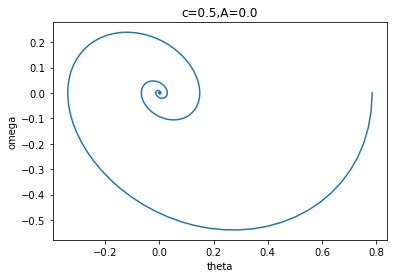

In [10]:
plot(thetalist, omegalist)
xlabel("theta")
ylabel("omega")
title("c=0.5,A=0.0")

Text(0.5, 1.0, 'c=0.5,A=0.5,f=1.0')

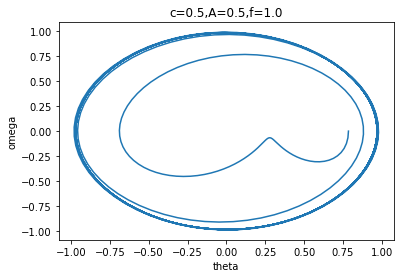

In [12]:
plot(thetalist, omegalist)
xlabel("theta")
ylabel("omega")
title("c=0.5,A=0.5,f=1.0")

Text(0.5, 1.0, 'c=0.0,A=0.1,f=1.0')

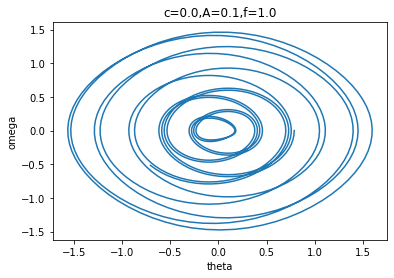

In [14]:
plot(thetalist, omegalist)
xlabel("theta")
ylabel("omega")
title("c=0.0,A=0.1,f=1.0")

Text(0.5, 1.0, 'c=0.5,A=1.2,f=2/3')

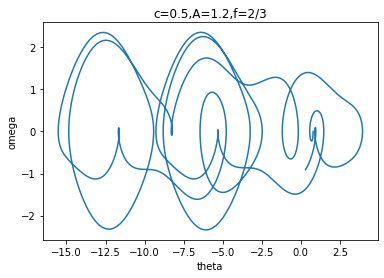

In [8]:
plot(thetalist, omegalist)
xlabel("theta")
ylabel("omega")
title("c=0.5,A=1.2,f=2/3")

In graphs 1-3 there is clearly a cycle that can be seen by the fact that the pattern repeats itself or is atleast self-similar in graph 1. Graph 4 has no apparent pattern which indicates that it is very chaotic.